In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet

In [4]:
train=pd.read_csv("./data/train/databinarystudents_train.csv")
train=train.drop(['id'], axis=1)
#train.head()

In [5]:
X_train=train.drop(['yL'], axis=1)
Y_train=train['yL']
X_train.shape, Y_train.shape

((120, 32), (120,))

In [6]:
test=pd.read_csv("./data/test/databinarystudents_test.csv")
test=test.drop(['id'], axis=1)
#test.head()

In [7]:
X_test=test.drop(['yL'], axis=1)
Y_test=test['yL']
X_test.shape, Y_test.shape

((30, 32), (30,))

#### Análisis variables numéricas vs target

Resumen estadístico

In [8]:
train.describe()

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.666667,63.887836,51.545833,0.316667,0.150000,0.050000,0.091667,0.125000,15.383806,26.425000,...,0.254489,0.037739,6.325000,5.608333,79.625782,0.125000,0.066667,4.108333,0.296166,0.509870
std,0.473381,10.216179,41.591189,0.467127,0.358569,0.218859,0.289765,0.332106,1.952842,15.826614,...,0.352119,0.148418,0.918187,0.972702,50.109709,0.332106,0.250490,2.152957,0.199186,0.306627
min,0.000000,34.217000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,11.107900,0.000000,...,0.000000,0.000000,4.000000,3.000000,11.087400,0.000000,0.000000,1.000000,0.011540,0.023037
25%,0.000000,56.677750,16.075000,0.000000,0.000000,0.000000,0.000000,0.000000,14.282493,22.750000,...,0.002000,0.000000,6.000000,5.000000,44.144175,0.000000,0.000000,2.000000,0.098875,0.190509
50%,1.000000,67.518000,40.650000,0.000000,0.000000,0.000000,0.000000,0.000000,15.382245,31.000000,...,0.033750,0.000100,6.000000,6.000000,70.322450,0.000000,0.000000,4.000000,0.263287,0.493752
75%,1.000000,71.182049,82.975000,1.000000,0.000000,0.000000,0.000000,0.000000,16.608645,37.250000,...,0.455000,0.001525,7.000000,6.000000,105.504000,0.000000,0.000000,6.000000,0.494643,0.816140
max,1.000000,78.836829,173.700000,1.000000,1.000000,1.000000,1.000000,1.000000,20.850060,45.000000,...,0.994200,0.846600,8.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


Correlación

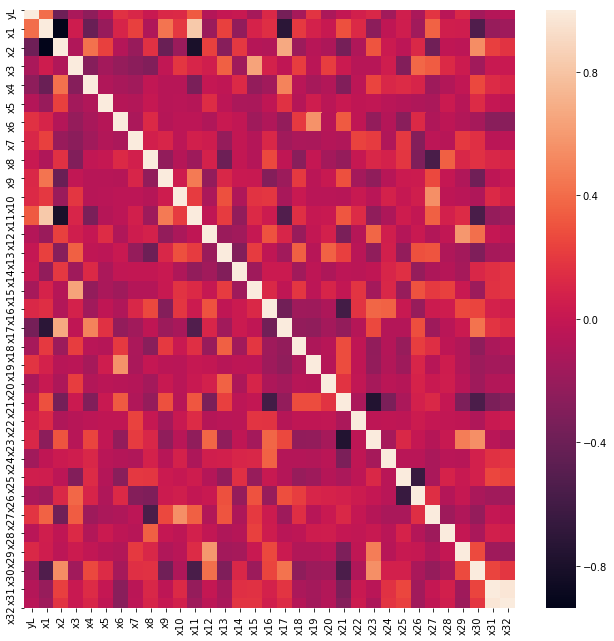

In [9]:
corrmat = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

Estandarización de regresoras Train

In [10]:
columns=X_train.columns.values.tolist()

In [11]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train=scaler.transform(X_train.fillna(0))

In [13]:
X_train=pd.DataFrame(X_train, columns=columns)

Estandarización de regresoras Test

In [14]:
columns1=X_test.columns.values.tolist()

In [15]:
X_test=scaler.transform(X_test.fillna(0))

In [16]:
X_test=pd.DataFrame(X_test, columns=columns1)

In [17]:
# Modelo con todas las características para determinar importancia

seed_val = 99
np.random.seed(seed_val)

model_all_features = LogisticRegression(C=1, penalty='elasticnet', solver='saga',
                                        l1_ratio=0.5, max_iter=10000)

model_all_features.fit(X_train, Y_train)

y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
auc_score_all = roc_auc_score(Y_test, y_pred_test)
print('Test all features model ROC AUC=%f' % (auc_score_all))

Test all features model ROC AUC=0.740000


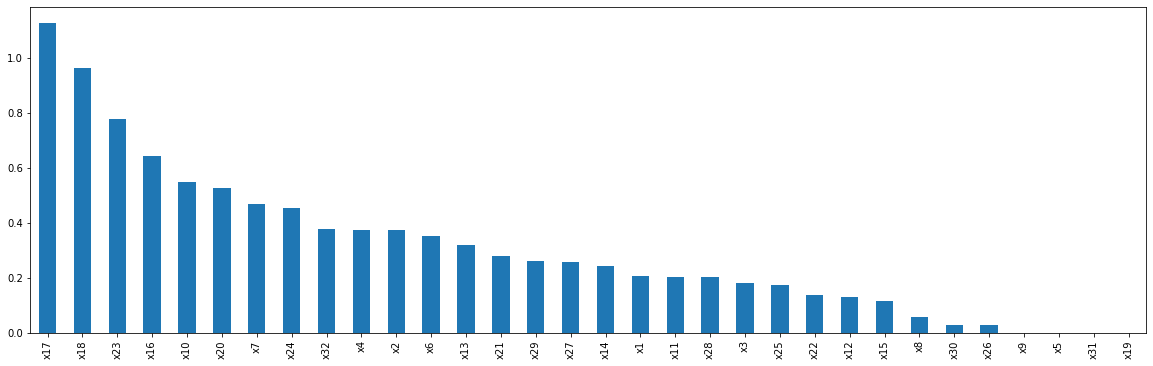

In [17]:
features = pd.Series(np.abs(model_all_features.coef_[0,:])) # esto con valor absoluto?
features.index = X_train.columns

features.sort_values(ascending=False, inplace=True)

features.plot.bar(figsize=(20,6))

In [18]:
features = features.index
features

['x17',
 'x18',
 'x23',
 'x16',
 'x10',
 'x20',
 'x7',
 'x24',
 'x32',
 'x4',
 'x2',
 'x6',
 'x13',
 'x21',
 'x29',
 'x27',
 'x14',
 'x1',
 'x11',
 'x28',
 'x3',
 'x25',
 'x22',
 'x12',
 'x15',
 'x8',
 'x30',
 'x26',
 'x9',
 'x5',
 'x31',
 'x19']

In [19]:
# Modelo con la característca más importante (desde la que se inicia la adición)

seed_val = 99
np.random.seed(seed_val)

model_one_feature = LogisticRegression(C=1, penalty='elasticnet', solver='saga',
                                        l1_ratio=0.5, max_iter=10000)

model_one_feature.fit(X_train[features[0]].to_frame(), Y_train)

y_pred_test = model_one_feature.predict_proba(X_test[features[0]].to_frame())[:, 1]
auc_score_first = roc_auc_score(Y_test, y_pred_test)
print('Test one feature model ROC AUC=%f' % (auc_score_first))

Test one feature model ROC AUC=0.700000


In [20]:
# Adición de características y evaluación de modelos, una a la vez (en orden de importancia)

tol = 0.001

print('doing recursive feature addition')

features_to_keep = [features[0]]

count = 1

for feature in features[1:]:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    model_int = LogisticRegression(C=1, penalty='elasticnet', solver='saga',
                                        l1_ratio=0.5, max_iter=10000)

    model_int.fit(
        X_train[features_to_keep + [feature] ], Y_train)

    y_pred_test = model_int.predict_proba(
        X_test[features_to_keep + [feature] ])[:, 1]

    auc_score_int = roc_auc_score(Y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((auc_score_int)))

    print('All features Test ROC AUC={}'.format((auc_score_first)))

    diff_auc = auc_score_int - auc_score_first

    if diff_auc >= tol:
        print('Increase in ROC AUC={}'.format(diff_auc))
        print('keep: ', feature)
        print

        auc_score_first = auc_score_int

        features_to_keep.append(feature)
    else:
        print('Increase in ROC AUC={}'.format(diff_auc))
        print('remove: ', feature)
        print

print()
print('DONE!!')
print('total features to keep: ', len(features_to_keep))
print('selected features: ', features_to_keep)
print('final test ROC AUC score={}'.format(auc_score_first))

doing recursive feature addition

testing feature:  x18  which is feature  1  out of  32
New Test ROC AUC=0.765
All features Test ROC AUC=0.7
Increase in ROC AUC=0.06500000000000006
keep:  x18

testing feature:  x23  which is feature  2  out of  32
New Test ROC AUC=0.8124999999999999
All features Test ROC AUC=0.765
Increase in ROC AUC=0.047499999999999876
keep:  x23

testing feature:  x16  which is feature  3  out of  32
New Test ROC AUC=0.8175
All features Test ROC AUC=0.8124999999999999
Increase in ROC AUC=0.0050000000000001155
keep:  x16

testing feature:  x10  which is feature  4  out of  32
New Test ROC AUC=0.85
All features Test ROC AUC=0.8175
Increase in ROC AUC=0.03249999999999997
keep:  x10

testing feature:  x20  which is feature  5  out of  32
New Test ROC AUC=0.835
All features Test ROC AUC=0.85
Increase in ROC AUC=-0.015000000000000013
remove:  x20

testing feature:  x7  which is feature  6  out of  32
New Test ROC AUC=0.85
All features Test ROC AUC=0.85
Increase in ROC AU

In [21]:
# Modelo con características seleccionadas

seed_val = 99
np.random.seed(seed_val)

final_xgb = LogisticRegression(C=1, penalty='elasticnet', solver='saga',
                                        l1_ratio=0.5, max_iter=10000)

final_xgb.fit(X_train[features_to_keep], Y_train)

y_pred_test = final_xgb.predict_proba(X_test[features_to_keep])[:,1]

ROC_AUC_final = roc_auc_score(Y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (ROC_AUC_final))

y_pred_test = final_xgb.predict(X_test[features_to_keep])

acc = accuracy_score(Y_test, y_pred_test)
print('Test selected features accuracy=%f' % (acc))

print()
print(classification_report(Y_test,y_pred_test))

Test selected features ROC AUC=0.890000
Test selected features accuracy=0.766667

              precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.78      0.90      0.84        20

    accuracy                           0.77        30
   macro avg       0.75      0.70      0.71        30
weighted avg       0.76      0.77      0.75        30

